<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module B: Section 17.1, 17.2, 17.3

Danika Young

# Interpolation Problem Statement



Interpolation is a method used to estimate values between known data points. It constructs a function that passes exactly through the given data points.

For a dataset with independent variables $(x_i)$ and dependent variables $(y_i)$, the goal is to find a function $(f(x))$ such that:


\[$
f(x_i) = y_i \quad \text{for all } i = 1, 2, \dots, n
\$]

This function $(f(x))$ can then be used to estimate the value $(f(x^*)$) for any $(x^*)$ within the range $([x_1, x_n]$).

### Key Points:
- **Exact Fit**: The function goes through all the given data points.
- **Estimate Values**: It finds values only within the range of the data.
- **Applications**: Used in data analysis, simulations, and more.


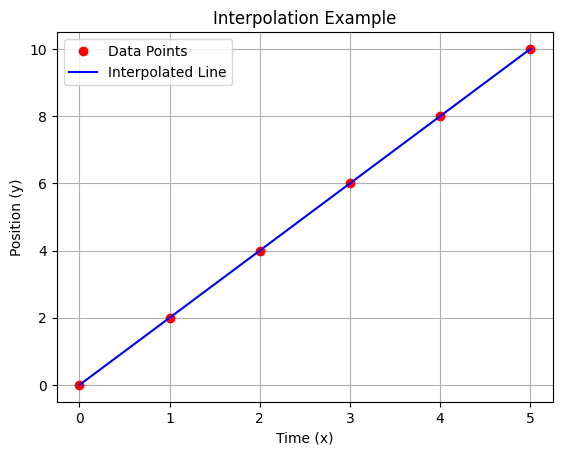

Estimated position at time 2.5: 5.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Given data points
x = [0, 1, 2, 3, 4, 5]  # Time
y = [0, 2, 4, 6, 8, 10]  # Position

# Create an interpolation function (linear interpolation)
linear_interp = interp1d(x, y, kind='linear')

# Define new points to estimate
x_new = np.linspace(0, 5, 50)  # Intermediate times
y_new = linear_interp(x_new)   # Estimated positions

# Plot the original data points
plt.plot(x, y, 'o', label='Data Points', color='red')

# Plot the interpolated values
plt.plot(x_new, y_new, '-', label='Interpolated Line', color='blue')

# Add labels and legend
plt.title('Interpolation Example')
plt.xlabel('Time (x)')
plt.ylabel('Position (y)')
plt.legend()
plt.grid()
plt.show()

# Example of estimating a specific value
specific_time = 2.5
estimated_position = linear_interp(specific_time)
print(f"Estimated position at time {specific_time}: {estimated_position}")


# Linear Interpolation

**Definition**:  
Linear interpolation is a method used to estimate the value of a function $f(x)$ at a given point $(x^*)$ by assuming that the function behaves linearly between two known data points.

Given two points $(x_1, y_1)$ and $(x_2, y_2)$, the formula for linear interpolation is:

\[$
f(x^*) = y_1 + \frac{(x^* - x_1)(y_2 - y_1)}{(x_2 - x_1)}
]$

### Key Features of Linear Interpolation:
- **Straight Line**: It connects two adjacent data points with a straight line.
- **Simplicity**: It is computationally simple and quick to implement.
- **Applicability**: Works well for small intervals or datasets with approximately linear trends.


### Limitations:
- **Not Smooth**: The result is not smooth; it consists of straight-line segments.
- **Linear Assumption**: It assumes the trend between points is linear, which may not always be accurate for nonlinear datasets.


In [2]:
# Given data points
x = [0, 1, 2]  # x-values
y = [0, 3, 6]  # y-values

# Linear interpolation formula
def linear_interpolation(x1, y1, x2, y2, x_star):
    return y1 + ((x_star - x1) * (y2 - y1) / (x2 - x1))

# Interpolating for x_star = 1.5
x1, y1 = x[1], y[1]  # (1, 3)
x2, y2 = x[2], y[2]  # (2, 6)
x_star = 1.5

result = linear_interpolation(x1, y1, x2, y2, x_star)
print(f"Interpolated value at x = {x_star}: {result}")





Interpolated value at x = 1.5: 4.5


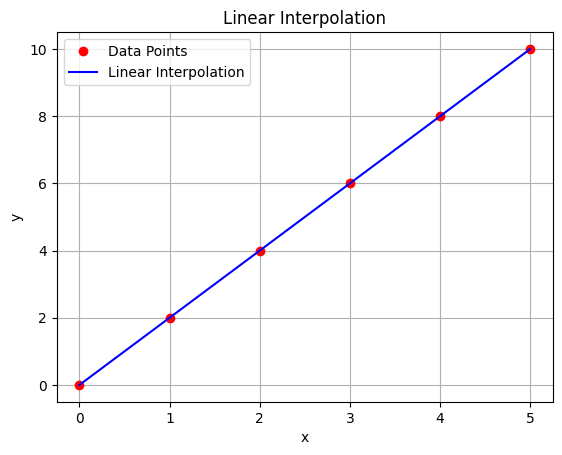

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Given data points
x = [0, 1, 2, 3, 4, 5]
y = [0, 2, 4, 6, 8, 10]

# Create an interpolation function
linear_interp = interp1d(x, y, kind='linear')

# Interpolating new points
x_new = np.linspace(0, 5, 50)  # Intermediate x-values
y_new = linear_interp(x_new)   # Interpolated y-values

# Plotting
plt.plot(x, y, 'o', label='Data Points', color='red')  # Original data points
plt.plot(x_new, y_new, '-', label='Linear Interpolation', color='blue')  # Interpolated line
plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


In [4]:
# Estimate the value at x = 3.5
x_value = 3.5
y_value = linear_interp(x_value)
print(f"Estimated value at x = {x_value}: {y_value}")


Estimated value at x = 3.5: 7.0


# Cubic Spline Interpolation

**Definition**:  
Cubic spline interpolation is a method that fits smooth cubic polynomials between each pair of data points. It ensures continuity in the first and second derivatives across the entire dataset, making it suitable for datasets with nonlinear trends.

A cubic spline $S_i(x)$ between two points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ is represented as:

$
S_i(x) = a_i (x - x_i)^3 + b_i (x - x_i)^2 + c_i (x - x_i) + d_i
$

Here, $a_i$, $b_i$, $c_i$, and $d_i$ are coefficients determined by solving a system of equations to satisfy the following conditions:
1. $S_i(x)$ passes through each data point.
2. The first and second derivatives are continuous at all data points.
3. The second derivative is zero at the endpoints (natural spline).

### Key Features of Cubic Spline Interpolation:
- **Smoothness**: Produces a smooth curve with continuous first and second derivatives.
- **Accuracy**: Handles nonlinear trends effectively.
- **Flexibility**: Adapts to different datasets with minimal assumptions.


### Applications:
- Data fitting for smooth trends.
- Numerical simulations requiring smooth transitions.
- Graphics and animation where smooth motion is essential.

### Limitations:
- Computationally more complex than linear interpolation.
- Requires solving a system of equations to compute coefficients.


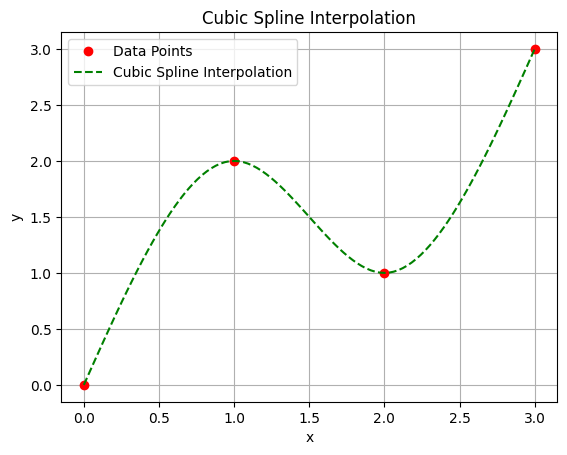

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Given data points
x = [0, 1, 2, 3]
y = [0, 2, 1, 3]

# Create a cubic spline interpolation function
cubic_spline = CubicSpline(x, y, bc_type='natural')

# Generate new points for interpolation
x_new = np.linspace(0, 3, 100)
y_new = cubic_spline(x_new)

# Plot the original data points
plt.plot(x, y, 'o', label='Data Points', color='red')

# Plot the cubic spline interpolation
plt.plot(x_new, y_new, '--', label='Cubic Spline Interpolation', color='green')

# Add labels and legend
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


In [6]:
# Estimate the value at x = 1.5
x_value = 1.5
y_value = cubic_spline(x_value)
print(f"Estimated value at x = {x_value}: {y_value}")


Estimated value at x = 1.5: 1.5


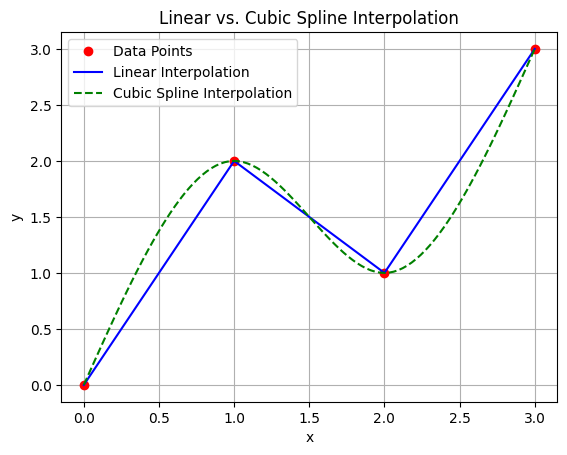

In [7]:
from scipy.interpolate import interp1d

# Linear interpolation for comparison
linear_interp = interp1d(x, y, kind='linear')
y_linear = linear_interp(x_new)

# Plot both interpolations
plt.plot(x, y, 'o', label='Data Points', color='red')
plt.plot(x_new, y_linear, '-', label='Linear Interpolation', color='blue')
plt.plot(x_new, y_new, '--', label='Cubic Spline Interpolation', color='green')

# Add labels and legend
plt.title('Linear vs. Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
